**load libraries**

we need basic libraries like pandas,numpy for data handling,seaborn is used for statistical graphics in Python.

sklearn is machine learning library which contain all ml algorithms and useful methods for preprocessing.this library contain lots of features like Cross-validation,train-split etc.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Data Profilling**

In [2]:
data = pd.read_excel('Data_Cortex_Nuclear.xls')

In [3]:
data.head(1)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m


In [4]:
data.shape

(1080, 82)

In [5]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [6]:
data.columns  

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

check null data

In [7]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [8]:
# Null list contains column names having null values
null_list=[]
for i in range (0,data.isnull().sum().shape[0]-1):
  if(data.isnull().sum()[i]>0):
    null_list.append(data.isnull().sum().index[i])


In [9]:
len(null_list)    # 49 columns having null values

49

Observation: 49 columns having null value

In [10]:
# catagorical list contains column names having categorial values
cat_features=[i for i in data.columns if data.dtypes[i]=='object'] 

In [11]:
len(cat_features)    # 5 columns having categorial data

5

5 columns having categorial data

In [12]:
data.nunique(axis=0)

MouseID      1080
DYRK1A_N     1077
ITSN1_N      1076
BDNF_N       1077
NR1_N        1077
             ... 
CaNA_N       1080
Genotype        2
Treatment       2
Behavior        2
class           8
Length: 82, dtype: int64

In [13]:
data['class'].value_counts()   # from this we can say labels are balanced

c-CS-m    150
c-SC-m    150
t-SC-s    135
t-SC-m    135
t-CS-m    135
c-SC-s    135
c-CS-s    135
t-CS-s    105
Name: class, dtype: int64


from this we can say labels are balanced

In [14]:

data.shape

(1080, 82)

-------------------------------------------------------------------------------
Observations:
------------------------------------------------------------------------------------

we perform data profilling for understanding the dataset 

size of dataset is 1080 rows × 82 columns

all columns are float datatype except MouseID,Genotype,Treatment,Behavior,class columns .

data.columns  is used to get list of all columns

data.nunique(axis=0) this function used to show unique value per column

49 columns having null values

5 columns having categorial data





--------------------------------------------------------------------------------



**Data cleaning**


**1)   handle Null values**

In [15]:
for i in range (0,len(null_list)-1):
  data[null_list[i]]=data[null_list[i]].fillna(data[null_list[i]].mean())

<AxesSubplot:>

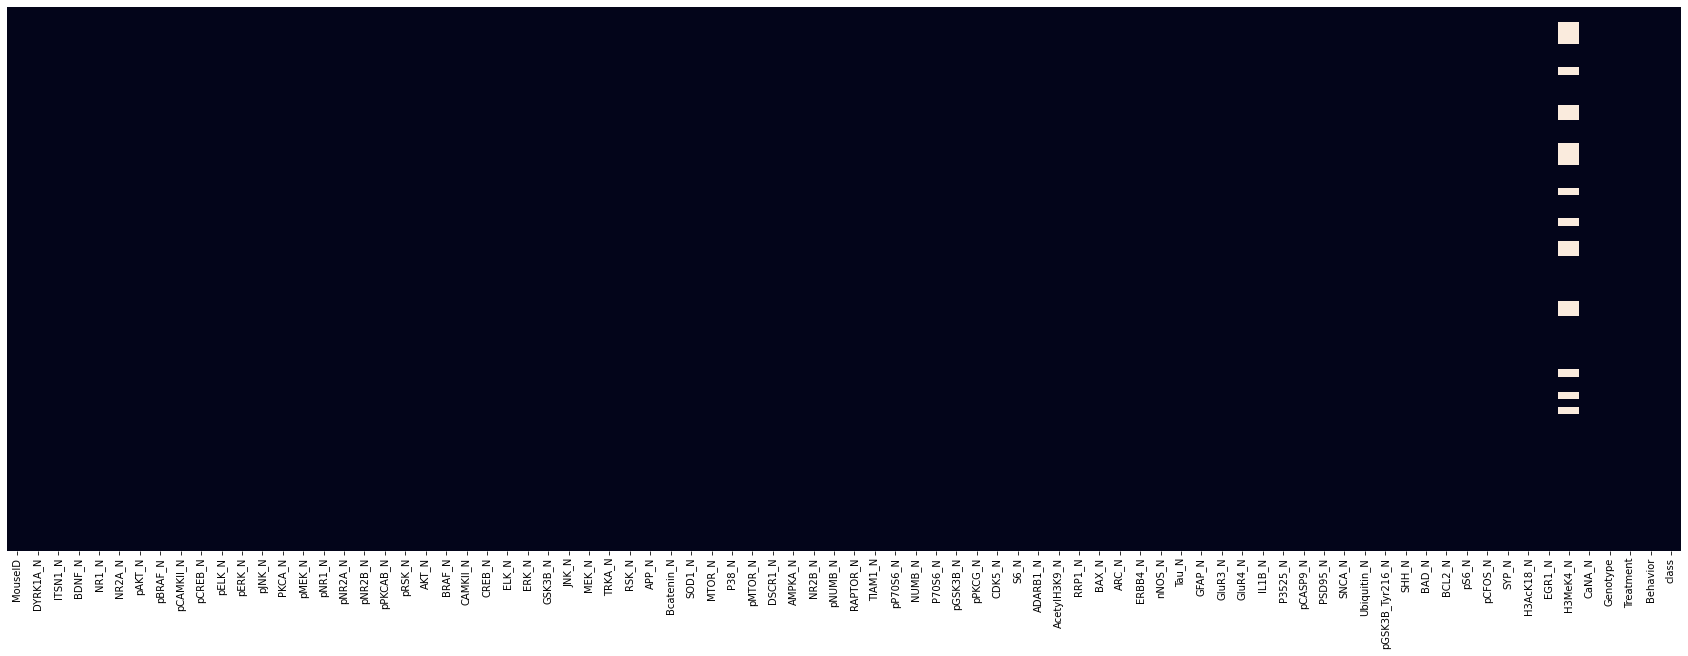

In [16]:
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [17]:
data['H3MeK4_N']=data['H3MeK4_N'].fillna(data['H3MeK4_N'].mean())

<AxesSubplot:>

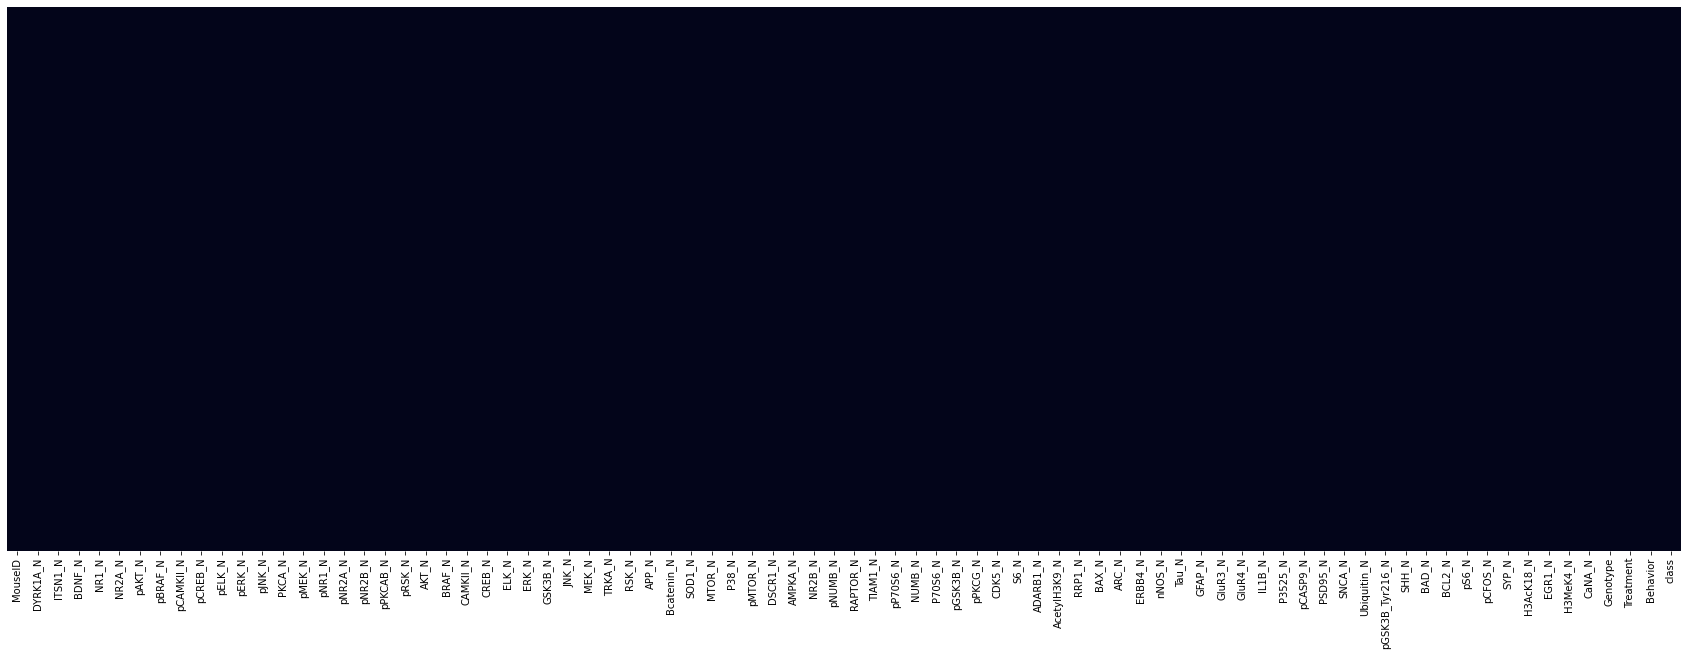

In [18]:
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

finally we get clean data free from missing  values


**2)   conversion of catogorical into integer using label-encoder**



In [19]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data['MouseID']= label_encoder.fit_transform(data['MouseID']) 
data['Genotype']= label_encoder.fit_transform(data['Genotype']) 
data['Treatment']= label_encoder.fit_transform(data['Treatment']) 
data['Behavior']= label_encoder.fit_transform(data['Behavior'])   
data['class']= label_encoder.fit_transform(data['class']) 

In [20]:

data.shape

(1080, 82)

when we perform one hot encoding dataframe size changes to **1080*89** but in this using label encoder case it reduce to 1080 * 82 **1080*82**

**3)  handling outlire**


tried to normalize the data but it didint work 

**we use quantile function to handle outlires**

using quntile function we can get extream boundrey

In [21]:

IQR=data.DYRK1A_N.quantile(0.75)-data.DYRK1A_N.quantile(0.25)
lower_bridge=data['DYRK1A_N'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['DYRK1A_N'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.010953971624999947
0.7866904453749999


(None, None)

In [22]:
data.loc[data['DYRK1A_N']>=0.78,'DYRK1A_N']=0.78

In [23]:

for i in range(1,len(data.columns)-5):
  #data[data.columns[1]].quantile(0.75)
  #qvalue=data[data.columns[i]].quantile(0.75)
  #data.loc[data['DYRK1A_N']>=0.78,'DYRK1A_N']=0.78
  #data.loc[data[data.columns[i]]>=qvalue,data.columns[i]]=qvalue
  IQR=data[data.columns[i]].quantile(0.75)-data[data.columns[i]].quantile(0.25)
  upper_bridge=data[data.columns[i]].quantile(0.75)+(IQR*1.5)
  data.loc[data[data.columns[i]]>=upper_bridge,data.columns[i]]=upper_bridge


**Model building**

In [24]:
x=data.iloc[:,0:79]
y=data.pop('class')
norm = MinMaxScaler().fit(x)
new_x = norm.transform(x)

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.25)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [27]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
prad2=neigh.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prad2)

array([[46,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prad2)

1.0